In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from datetime import datetime, timedelta
df = pd.read_csv('complete.csv',low_memory = False)
df.head()

,date,hour,east_side,west_side,temperature,humidity,pressure,description,wind_direction,wind_speed,week_status,day_of_week
0,2012-11-30,0.0,2.0,5.0,7.42,87.0,1003.0,light rain,0.0,0.0,Weekday,Fri
1,2012-11-30,1.0,1.0,0.0,7.78,87.0,1003.0,light rain,0.0,1.0,Weekday,Fri
2,2012-11-30,2.0,1.0,0.0,8.13,87.0,1003.0,light rain,160.0,2.0,Weekday,Fri
3,2012-11-30,3.0,1.0,0.0,8.24,64.0,1025.0,sky is clear,270.0,10.0,Weekday,Fri
4,2012-11-30,4.0,2.0,6.0,8.66,68.0,1019.0,overcast clouds,309.0,5.0,Weekday,Fri


Text(0, 0.5, 'Frequency')

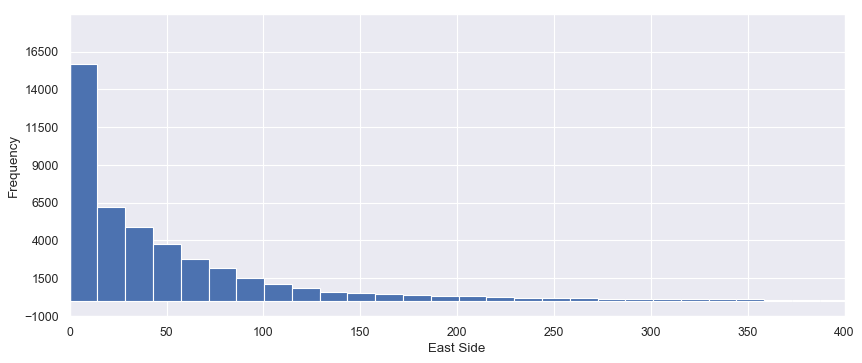

In [2]:
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.hist(df['east_side'],bins = 50)
plt.xlim(0, 400) 
plt.ylim(0, 19000)
plt.yticks(np.arange(-1000,17500,2500))
plt.xlabel('East Side')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

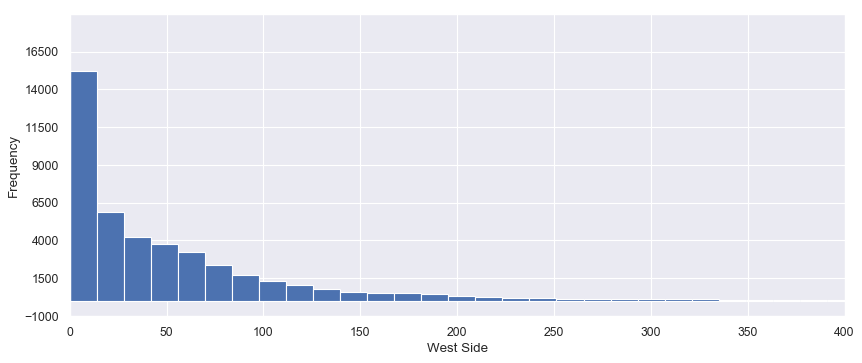

In [3]:
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.hist(df['west_side'],bins = 50)
plt.xlim(0, 400) 
plt.ylim(0, 19000)
plt.yticks(np.arange(-1000,17500,2500))
plt.xlabel('West Side')
plt.ylabel('Frequency')

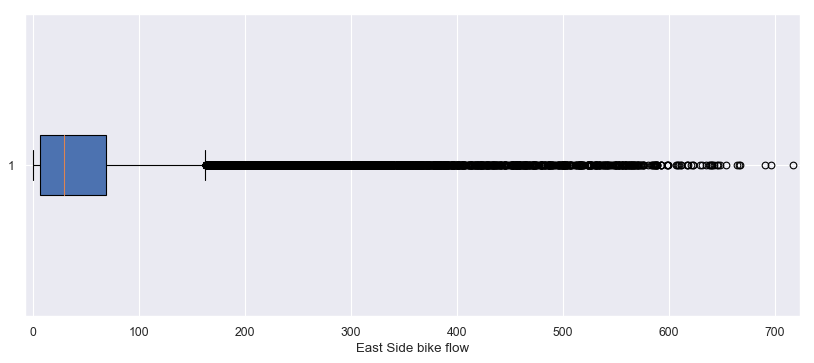

In [4]:
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.boxplot(df['east_side'],vert = False,patch_artist=True,widths = 0.2)
plt.xticks(np.arange(0,800,100))
plt.xlabel('East Side bike flow')
plt.margins(0.01)

In [5]:
print("Percentage of East Side in range of 0-200")
print("{:.3f}%".format(
    (df[df.east_side <= 200]["east_side"].count()*100.0) / df.shape[0]))

Percentage of East Side in range of 0-200
93.953%


In [6]:
print("Percentage of West Side in range of 0-200")
print("{:.3f}%".format(
    (df[df.west_side <= 200]["west_side"].count()*100.0) / df.shape[0]))

Percentage of West Side in range of 0-200
95.306%


Text(0, 0.5, 'East side')

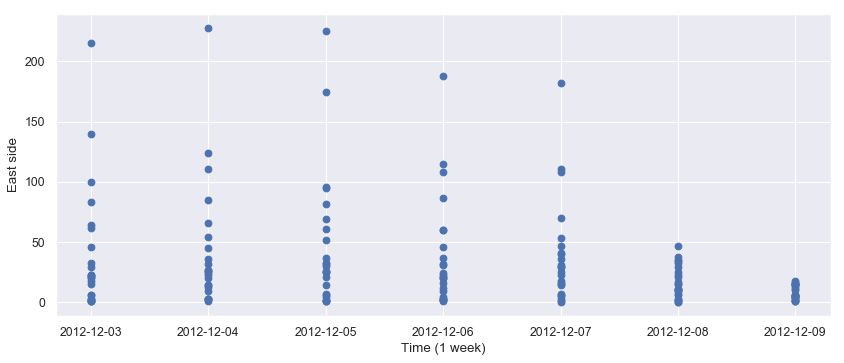

In [7]:
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.scatter(df['date'][72:240],df['east_side'][72:240])
plt.xlabel('Time (1 week)')
plt.ylabel('East side')

Text(0, 0.5, 'West side')

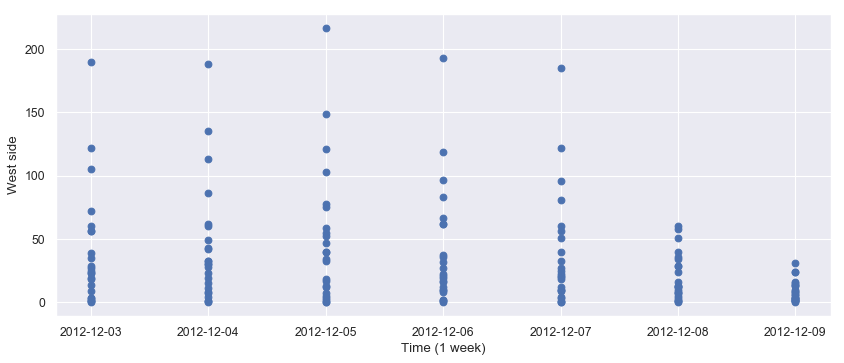

In [8]:
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.scatter(df['date'][72:240],df['west_side'][72:240])
plt.xlabel('Time (1 week)')
plt.ylabel('West side')

Text(0, 0.5, 'East side')

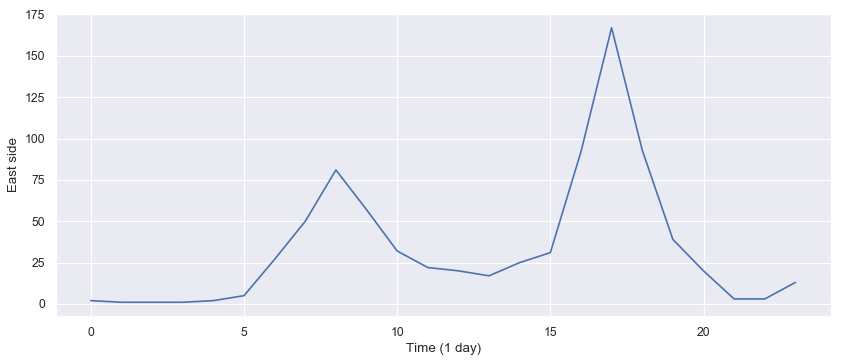

In [9]:
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.plot(df['hour'][0:24],df['east_side'][0:24])
plt.xlabel('Time (1 day)')
plt.ylabel('East side')

Text(0, 0.5, 'West side')

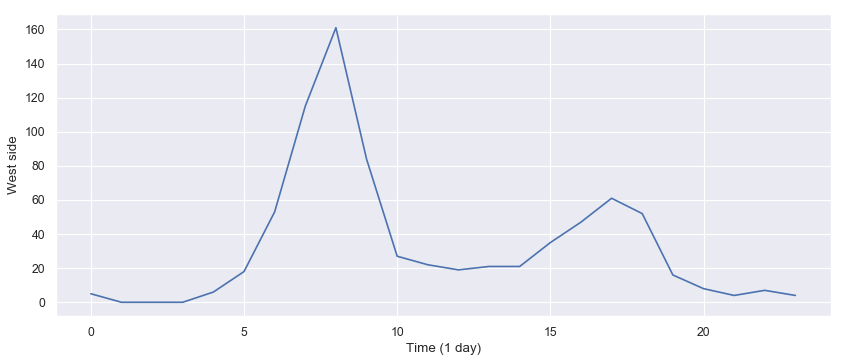

In [10]:
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.plot(df['hour'][0:24],df['west_side'][0:24])
plt.xlabel('Time (1 day)')
plt.ylabel('West side')

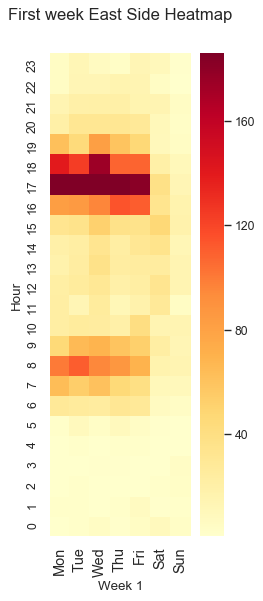

In [14]:
df_w1 = df.iloc[72:240]
table = pd.pivot_table(df_w1,index=["hour"], values = "east_side", columns = "day_of_week",aggfunc='mean').reset_index()
t1 = pd.DataFrame()
t1['Mon'] = table['Mon']
t1['Tue'] = table['Tue']
t1['Wed'] = table['Wed']
t1['Thu'] = table['Thu']
t1['Fri'] = table['Fri']
t1['Sat'] = table['Sat']
t1['Sun'] = table['Sun']

sns.set()
plt.figure(figsize=(3,8),dpi = 80)
ax = sns.heatmap(t1,cmap="YlOrRd",robust=True, square = True)
ax.set(xlabel = 'Week 1',ylabel = 'Hour')
ax.set_title('First week East Side Heatmap',fontsize = 15,pad = 30)
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax.set_xticklabels(weekday, rotation='vertical', fontsize=13)
ax.invert_yaxis()

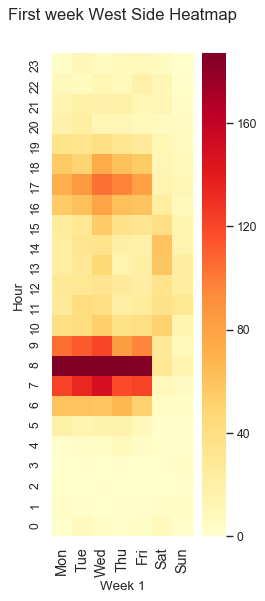

In [15]:
table = pd.pivot_table(df_w1,index=["hour"], values = "west_side", columns = "day_of_week",aggfunc='mean').reset_index()
t2 = pd.DataFrame()
t2['Mon'] = table['Mon']
t2['Tue'] = table['Tue']
t2['Wed'] = table['Wed']
t2['Thu'] = table['Thu']
t2['Fri'] = table['Fri']
t2['Sat'] = table['Sat']
t2['Sun'] = table['Sun']
sns.set()
plt.figure(figsize=(3,8),dpi = 80)
ax = sns.heatmap(t2,cmap="YlOrRd",robust=True, square = True)
ax.set(xlabel = 'Week 1',ylabel = 'Hour')
ax.set_title('First week West Side Heatmap',fontsize = 15,pad = 30)
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax.set_xticklabels(weekday, rotation='vertical', fontsize=13)
ax.invert_yaxis()

Text(0.5, 1.0, 'Corrleation')

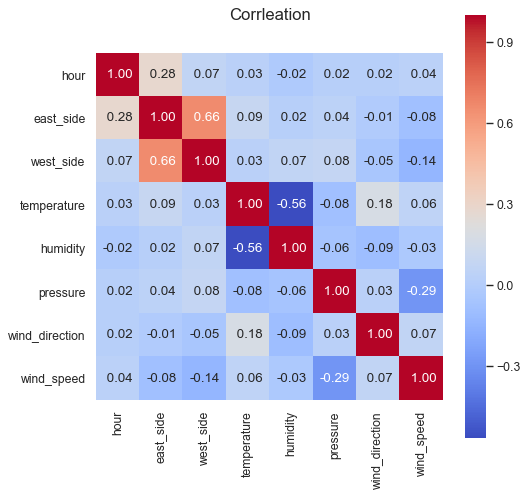

In [18]:
df_r1 = df.iloc[:, [1,2,3,4,5,6,8,9]]
corr = df_r1.corr()
plt.figure(figsize=(7,7),dpi = 80)
ax = sns.heatmap(corr,cmap = "coolwarm",square = True, annot = True, fmt = ' .2f')
ax.set_title('Corrleation',fontsize = 15,pad = 30)